# About Dataset
Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Domain: Banking

Context:
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

Learning Outcomes:

● Exploratory Data Analysis

● Preparing the data to train a model

● Training and making predictions using an Ensemble Model

● Comparing model performances

Objective:

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Steps and tasks:

1. Import the necessary libraries
2. Read the data as a data frame
3. Perform basic EDA which should include the following and print out your insights at every step.

    a. Shape of the data
    
    b. Data type of each attribute
    
    c. Checking the presence of missing values
    
    d. 5 point summary of numerical attributes
    
    e. Checking the presence of outliers
    
    
4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing   values etc
5. Train a few standard classification algorithms, note and comment on their performances along different metrics.
6. Build the ensemble models and compare the results with the base models.
Note: Random forest can be used only with Decision trees.
7. Compare performances of all the models


References:

● Data analytics use cases in Banking

● Machine Learning for Financial Marketing

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read Data

In [2]:
Bank = pd.read_csv("bank.csv")

In [3]:
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [4]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
Bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
Bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
Bank.duplicated().sum()

0

In [9]:
Bank.shape

(45211, 17)

In [10]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
Bank.isnull().sum()*100/Bank.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
Target       0.0
dtype: float64

In [12]:
Bank_df = Bank.copy()

In [13]:
Bank_df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
Bank_df.rename(columns = {'Target':'deposit'}, inplace = True)

In [15]:
Bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


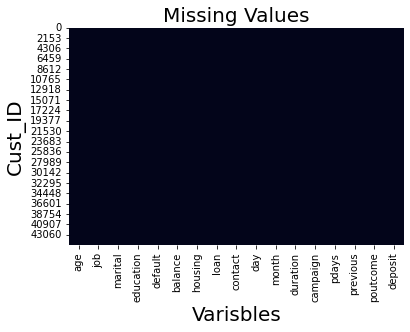

In [16]:
sns.heatmap(Bank_df.isnull(),cbar = False)

plt.title("Missing Values", fontsize = 20)
plt.xlabel("Varisbles", fontsize = 20)
plt.ylabel("Cust_ID", fontsize = 20)

plt.show()


There are no horizontal lines in the heatmap which would correspond to a probable missing values.



In [17]:
Bank_df["age"]

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

<AxesSubplot: >

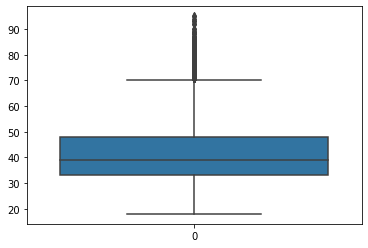

In [18]:
sns.boxplot(Bank_df["age"])

In [19]:
Bank_df.shape

(45211, 17)

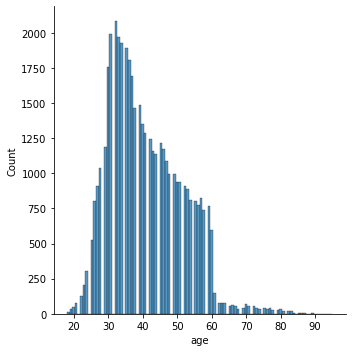

In [20]:
sns.displot(Bank_df.age, bins = 100)

<AxesSubplot: >

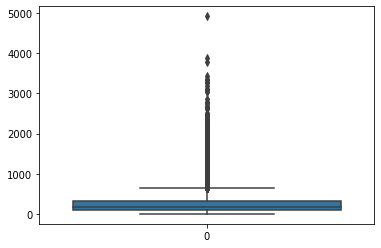

In [21]:
sns.boxplot(Bank_df["duration"])

plt.boxplot(bank.duration) Q1=bank.duration.quantile(0.25) Q3=bank.duration.quantile(0.75) IQR=Q3-Q1 bank = bank[(bank.duration >= Q1-1.5IQR) & (bank.duration <= Q3+1.5IQR)]

In [22]:
Bank_df.shape

(45211, 17)

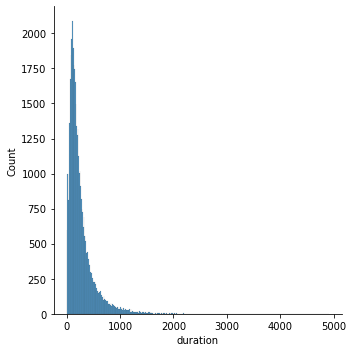

In [23]:
sns.displot(Bank_df.duration)

In [24]:
Bank_df["job"].head

<bound method NDFrame.head of 0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object>

In [25]:
Bank_df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [26]:
jobs = ["blue-collar", "management", "technician", "admin.", "services", "retired", "self-employed", "entrepreneur", "unemployed",
       "housemaid", "student","unknown" ]

for j in jobs:
    print("{:12} :{:4}".format(j, len(Bank_df[(Bank_df.deposit == "yes") & (Bank.job == j)])))

blue-collar  : 708
management   :1301
technician   : 840
admin.       : 631
services     : 369
retired      : 516
self-employed : 187
entrepreneur : 123
unemployed   : 202
housemaid    : 109
student      : 269
unknown      :  34


In [27]:
Bank_df["job"] = Bank_df["job"].replace(["management", "admin."], "white-collar") 
Bank_df["job"] = Bank_df["job"].replace(["services", "housemaid"], "pink-collar")
Bank_df["job"] = Bank_df["job"].replace(["retired", "student", "unemployed", "unknown"], "others") 

In [28]:
Bank_df.job.value_counts()

white-collar     14629
blue-collar       9732
technician        7597
pink-collar       5394
others            4793
self-employed     1579
entrepreneur      1487
Name: job, dtype: int64

In [29]:
Bank_df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [30]:
Bank_df["poutcome"] = Bank_df["poutcome"].replace(["others"], "unknown")


In [31]:
Bank_df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [32]:
Bank_df.drop("contact", axis = 1, inplace = True)

In [33]:
num_values = ["default", "housing", "loan", "deposit"]
for i in num_values:
    Bank_df[i] = Bank_df[i].map({"yes":1, "no":0})

In [34]:
Bank_df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,white-collar,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,may,92,1,-1,0,unknown,0
4,33,others,single,unknown,0,1,0,0,5,may,198,1,-1,0,unknown,0


In [35]:
Bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [36]:
Bank_data = Bank_df.fillna(0)

In [37]:
Bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [38]:
Bank_data.drop("month", axis = 1, inplace = True)
Bank_data.drop("day", axis = 1, inplace = True)

In [39]:
print("Customers that have not contacted before : ", len (Bank_data[Bank_data.pdays==-1]))
print("Maximum values on pdays : ", Bank_data["pdays"].max())

Customers that have not contacted before :  36954
Maximum values on pdays :  871


In [40]:
Bank_data.loc[Bank_data["pdays"]== -1, "pdays"] = 10000

In [41]:
Bank_data["recent_padys"] = np.where(Bank_data["pdays"], 1/Bank_data.pdays, 1/Bank_data.pdays)
Bank_data.drop("pdays", axis = 1, inplace = True)

In [42]:
Bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit,recent_padys
45206,51,technician,married,tertiary,0,825,0,0,977,3,0,unknown,1,0.000100
45207,71,others,divorced,primary,0,1729,0,0,456,2,0,unknown,1,0.000100
45208,72,others,married,secondary,0,5715,0,0,1127,5,3,success,1,0.005435
45209,57,blue-collar,married,secondary,0,668,0,0,508,4,0,unknown,0,0.000100
45210,37,entrepreneur,married,secondary,0,2971,0,0,361,2,11,other,0,0.005319


In [43]:
#Bank_with_dummies = Bank_data

In [44]:
Bank_with_dummies = pd.get_dummies(data = Bank_data, columns = ["job", "marital", "education", "poutcome"],
                                  prefix = ["job", "marital", "education", "poutcome"])

In [45]:
Bank_with_dummies.head()

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_padys,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,0,0,0.0001,...,1,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,151,1,0,0,0.0001,...,0,1,0,1,0,0,0,0,0,1
2,33,0,2,1,1,76,1,0,0,0.0001,...,1,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,92,1,0,0,0.0001,...,1,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,198,1,0,0,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [46]:
Bank_with_dummies.shape

(45211, 28)

In [47]:
Bank_with_dummies.describe()

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_padys,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,0.580323,0.116985,0.002166,...,0.601933,0.282896,0.151534,0.513194,0.294198,0.041074,0.108403,0.040698,0.033421,0.817478
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,2.303441,0.321406,0.024128,...,0.489505,0.450411,0.358572,0.499831,0.455687,0.198464,0.310892,0.197592,0.179735,0.386278
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,0.000000,0.000000,0.000100,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,0.000000,0.000000,0.000100,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,275.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


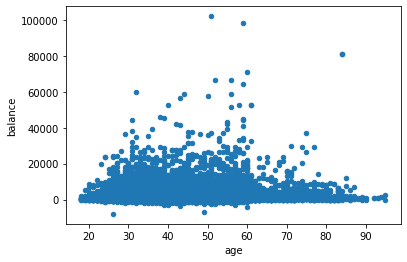

In [48]:
Bank_with_dummies.plot(kind = "scatter", x = "age", y ="balance");

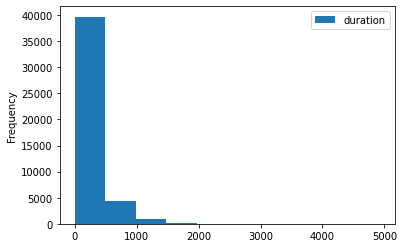

In [49]:
Bank_with_dummies.plot(kind = "hist", x = "poutcome_success", y = "duration");

In [50]:
Bank_with_dummies[Bank_data.deposit == 1].describe()

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_padys,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,0.009832,1804.267915,0.365854,0.091511,537.294574,2.141047,1.170354,1.0,0.004238,...,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.058045,0.184912,0.640197
std,13.497781,0.098676,3501.104777,0.481714,0.288361,392.525262,1.921826,2.553272,0.0,0.035686,...,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.233851,0.388263,0.479988
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,210.000000,0.000000,0.000000,244.000000,1.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,733.000000,0.000000,0.000000,426.000000,2.000000,0.000000,1.0,0.000100,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,0.000000,2159.000000,1.000000,0.000000,725.000000,3.000000,1.000000,1.0,0.005128,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,3881.000000,32.000000,58.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
len(Bank_with_dummies[(Bank_with_dummies.deposit ==1) & (Bank_with_dummies.loan) & (Bank_with_dummies.housing)])

265

In [52]:
len(Bank_with_dummies[(Bank_with_dummies.deposit ==1) & (Bank_with_dummies.default == 1)])

52

<AxesSubplot: xlabel='job', ylabel='deposit'>

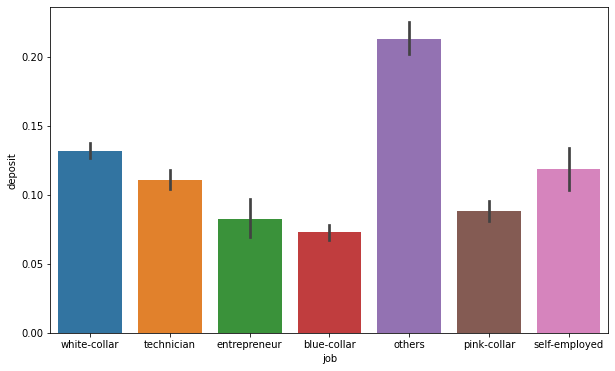

In [53]:
plt.figure(figsize = (10,6))
sns.barplot(x = "job", y = "deposit", data = Bank_data)

<AxesSubplot: xlabel='poutcome', ylabel='deposit'>

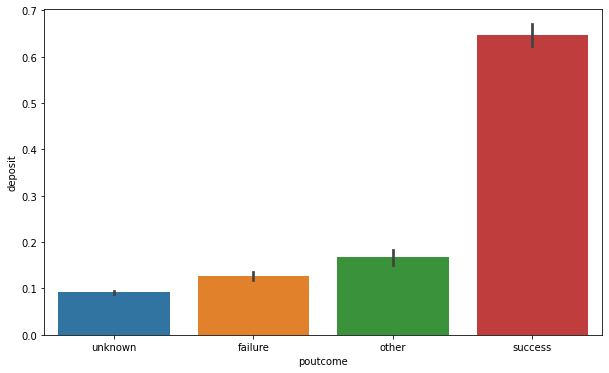

In [54]:
plt.figure(figsize = (10,6))
sns.barplot(x = "poutcome", y = "deposit", data = Bank_data)

In [55]:
Bank_dup = Bank_with_dummies

In [56]:
corr = Bank_dup.corr()
corr

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_padys,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.004648,0.004760,0.001288,0.025155,0.012884,...,0.286257,-0.427817,0.196182,-0.093979,-0.081629,0.069665,-0.004927,-0.022967,0.035526,-0.000816
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,-0.010021,0.016822,-0.018329,-0.022419,-0.009932,...,-0.014460,0.003115,0.001623,0.013220,-0.015239,-0.001236,-0.026389,-0.014445,-0.023344,0.039490
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.021560,-0.014578,0.016674,0.052838,-0.003702,...,0.025708,-0.012537,-0.015451,-0.069937,0.084001,0.011181,0.011857,0.008466,0.035240,-0.030271
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,0.005075,-0.023599,0.037076,-0.139173,-0.017263,...,0.017681,-0.020475,0.010671,0.101659,-0.099175,-0.047595,0.106795,0.039710,-0.091360,-0.063755
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,-0.012412,0.009980,-0.011043,-0.068185,-0.005574,...,0.036906,-0.051716,-0.012396,0.070625,-0.045940,-0.049992,-0.002186,-0.009099,-0.053713,0.031406
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,1.000000,-0.084570,0.001203,0.394521,-0.003196,...,-0.022683,0.020328,-0.003660,0.002084,0.000891,-0.000682,-0.018925,-0.001958,0.042389,-0.003491
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,-0.084570,1.000000,-0.032855,-0.073172,-0.023789,...,0.031371,-0.023120,0.009616,-0.020893,0.012866,0.005704,-0.088131,-0.020107,-0.057486,0.107965
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,0.001203,-0.032855,1.000000,0.093236,0.099094,...,-0.012691,0.017006,-0.016705,-0.005603,0.022888,-0.008257,0.350627,0.306615,0.201424,-0.532763
deposit,0.025155,-0.022419,0.052838,-0.139173,-0.068185,0.394521,-0.073172,0.093236,1.000000,0.031259,...,-0.060260,0.063526,-0.040393,-0.036388,0.066448,0.012053,0.009885,0.031955,0.306788,-0.167051
recent_padys,0.012884,-0.009932,-0.003702,-0.017263,-0.005574,-0.003196,-0.023789,0.099094,0.031259,1.000000,...,0.003896,0.000233,-0.010473,-0.008755,0.017972,-0.000294,0.064452,0.161814,0.099985,-0.181169


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

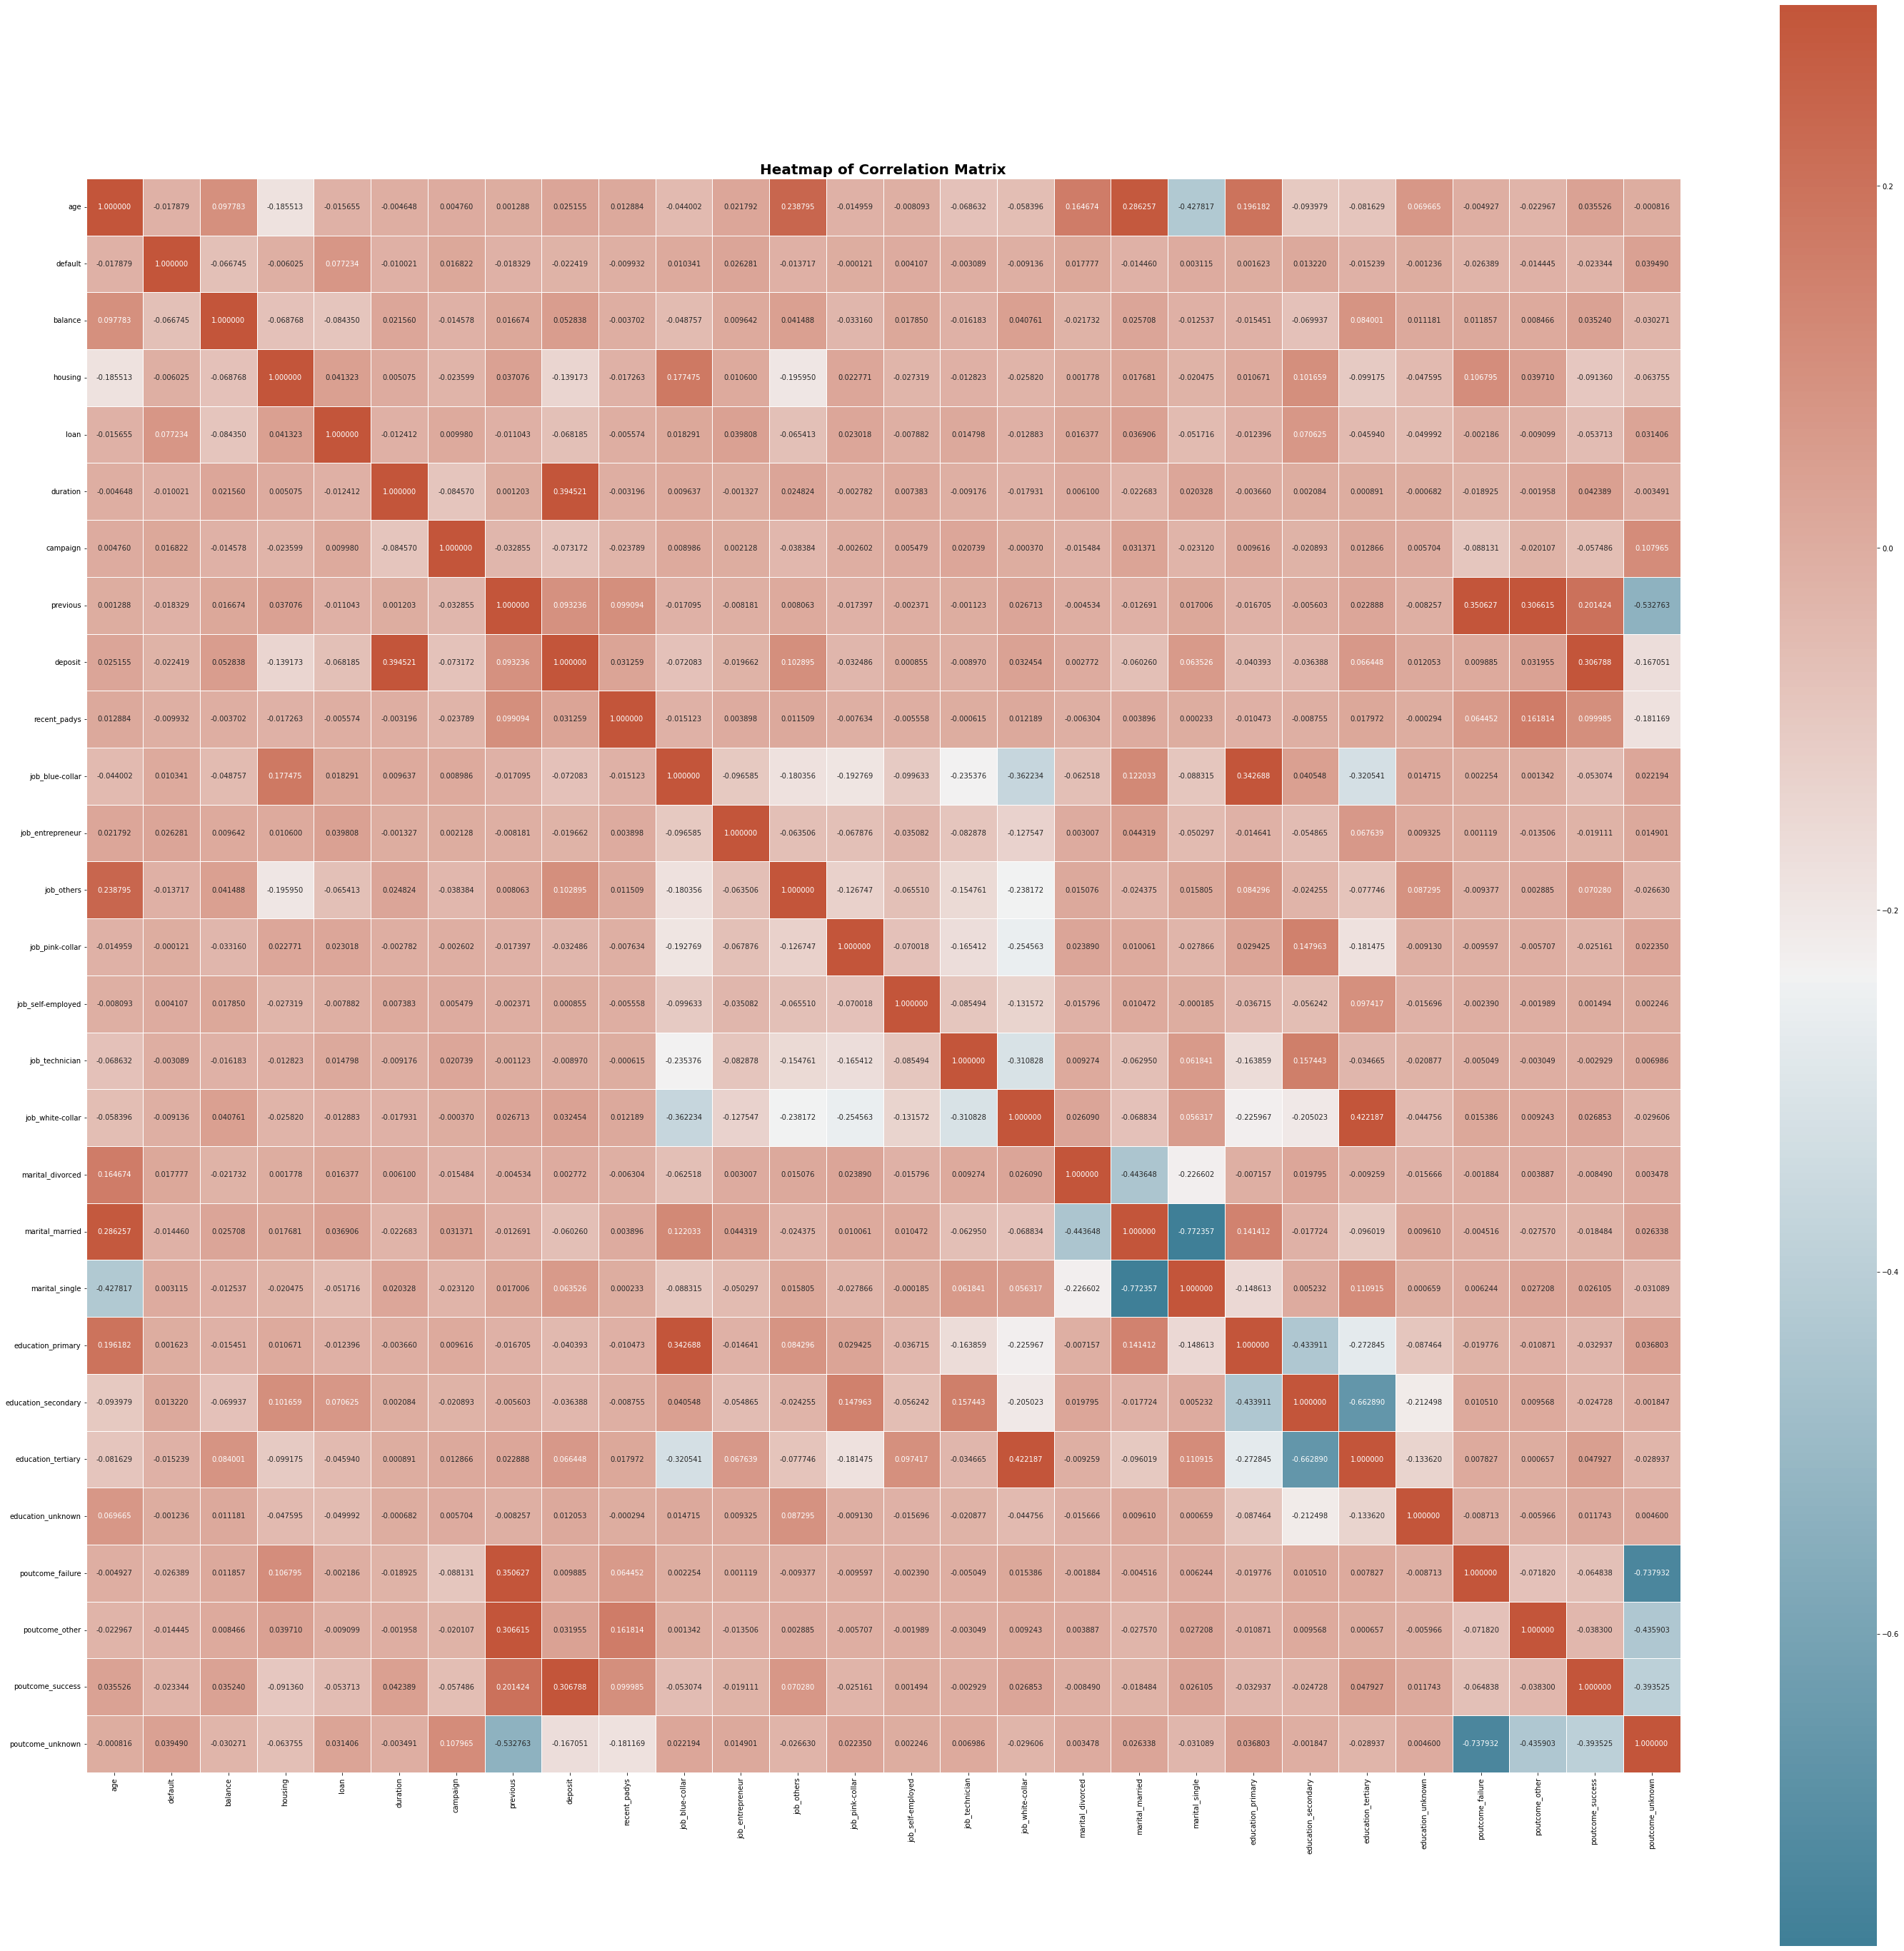

In [57]:
plt.figure(figsize = (50,50), )
cmap = sns.diverging_palette(225,20, as_cmap = True)
sns.heatmap(corr, annot = True, xticklabels  = corr.columns.values, yticklabels=corr.columns, 
            cmap=cmap, vmax = .3, square = True, linewidths = .5, fmt = '1f')
plt.title("Heatmap of Correlation Matrix", fontweight = "bold", fontsize = 20)

In [58]:
corr_deposite = pd.DataFrame(corr["deposit"].drop("deposit"))
print(corr_deposite.sort_values(by = "deposit", ascending = False))

                      deposit
duration             0.394521
poutcome_success     0.306788
job_others           0.102895
previous             0.093236
education_tertiary   0.066448
marital_single       0.063526
balance              0.052838
job_white-collar     0.032454
poutcome_other       0.031955
recent_padys         0.031259
age                  0.025155
education_unknown    0.012053
poutcome_failure     0.009885
marital_divorced     0.002772
job_self-employed    0.000855
job_technician      -0.008970
job_entrepreneur    -0.019662
default             -0.022419
job_pink-collar     -0.032486
education_secondary -0.036388
education_primary   -0.040393
marital_married     -0.060260
loan                -0.068185
job_blue-collar     -0.072083
campaign            -0.073172
housing             -0.139173
poutcome_unknown    -0.167051


In [59]:
Bank_dup = Bank_dup.drop("deposit", 1)

C:\Users\Ram\AppData\Local\Temp\ipykernel_22556\3369725277.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Bank_dup = Bank_dup.drop("deposit", 1)


In [60]:
Bank_dup.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'previous', 'recent_padys', 'job_blue-collar', 'job_entrepreneur',
       'job_others', 'job_pink-collar', 'job_self-employed', 'job_technician',
       'job_white-collar', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:


scaler = MinMaxScaler()
num_vars = ['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'previous', 'recent_padys', 'job_blue-collar', 'job_entrepreneur',
       'job_others', 'job_pink-collar', 'job_self-employed', 'job_technician',
       'job_white-collar', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']
Bank_dup[num_vars] = scaler.fit_transform(Bank_dup[num_vars])
Bank_dup.head()

,age,default,balance,housing,loan,duration,campaign,previous,recent_padys,job_blue-collar,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.0,0.092259,1.0,0.0,0.053070,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.0,0.073067,1.0,0.0,0.030704,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.0,0.072822,1.0,1.0,0.015453,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.0,0.086476,1.0,0.0,0.018707,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.194805,0.0,0.072812,0.0,0.0,0.040260,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x = Bank_dup
y = Bank_with_dummies.deposit

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [66]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (36168, 27)
y_train (36168,)
x_test (9043, 27)
y_test (9043,)


In [67]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter

oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

counter = Counter(y)
print(counter)

Counter({0: 39922, 1: 39922})


In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [69]:
#MODEL BUILDING

# 1. Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [71]:
logreg = LogisticRegression (solver = "lbfgs", max_iter = 400)

logreg.fit(x_train, y_train)

y_pred_LG = logreg.predict(x_test)

In [72]:
cfm = metrics.confusion_matrix(y_test, y_pred_LG)
cfm

array([[7788,  192],
       [ 744,  319]], dtype=int64)

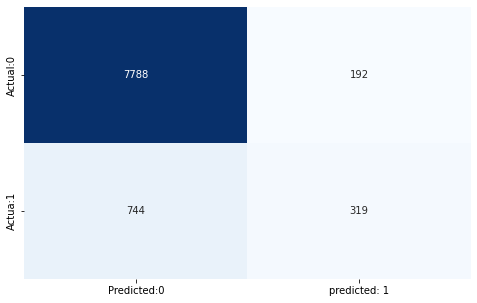

In [73]:


cm = confusion_matrix(y_test, y_pred_LG)

conf_matrix = pd.DataFrame(data = cm, columns = ["Predicted:0", "predicted: 1"], index = ["Actual:0", "Actua:1"])

plt.figure(figsize =(8,5))

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", cbar = False)
plt.show()

In [74]:
result = classification_report(y_test, y_pred_LG)

print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7980
           1       0.62      0.30      0.41      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.64      0.67      9043
weighted avg       0.88      0.90      0.88      9043



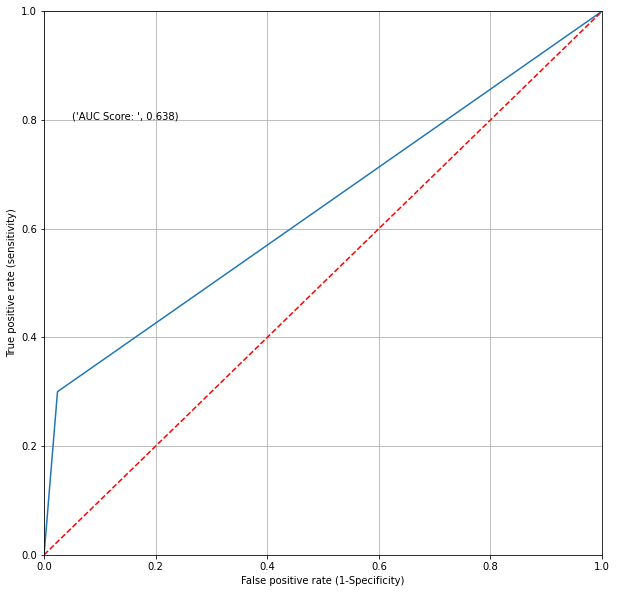

In [75]:
plt.rcParams ["figure.figsize"] = (10,10)

fpr, tpr, thersholds = roc_curve(y_test, y_pred_LG)

plt.plot(fpr, tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1], "r--")

plt.text(x = 0.05, y = 0.8, s = ("AUC Score: ", round (roc_auc_score(y_test, y_pred_LG), 4)))

plt.xlabel("False positive rate (1-Specificity)")
plt.ylabel("True positive rate (sensitivity)")

plt.grid(True)

In [76]:
cols = ["Model", "AUC Score", "Precision Score", "Recall Score", "Accuracy Score", "f1-Score"]

result_tabulation = pd.DataFrame(columns=cols)

logistic_regression = pd.Series({"Model" : "logistic_regression",
                                "AUC Score" : metrics.roc_auc_score(y_test, y_pred_LG),
                               "Precision Score" : metrics.precision_score(y_test, y_pred_LG),
                               "Recall Score" : metrics.accuracy_score(y_test, y_pred_LG),
                               "f1-Score" : metrics.f1_score(y_test, y_pred_LG)})

result_tabulation = result_tabulation.append(logistic_regression , ignore_index = True)

C:\Users\Ram\AppData\Local\Temp\ipykernel_22556\1811995678.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(logistic_regression , ignore_index = True)


In [77]:
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-Score
0,logistic_regression,0.638017,0.624266,0.896495,NaN,0.405337


In [78]:
# 2. Ada Boost Classifier


In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix


In [80]:
AB = AdaBoostClassifier(random_state=10)

AB.fit(x_train, y_train)

y_pred_AB = AB.predict(x_test)

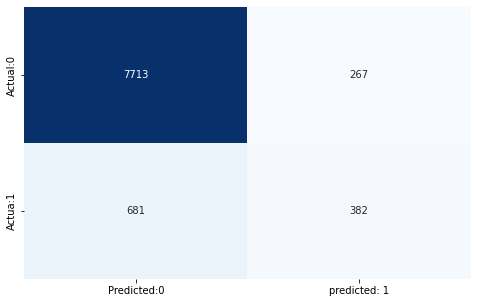

In [81]:
cm = confusion_matrix(y_test, y_pred_AB)

conf_matrix = pd.DataFrame(data=cm, columns = ["Predicted:0", "predicted: 1"], index = ["Actual:0", "Actua:1"])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", cbar = False)

result = classification_report(y_test, y_pred_AB)

plt.show()

In [82]:
result = classification_report(y_test, y_pred_AB)

print(result)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.59      0.36      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.75      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



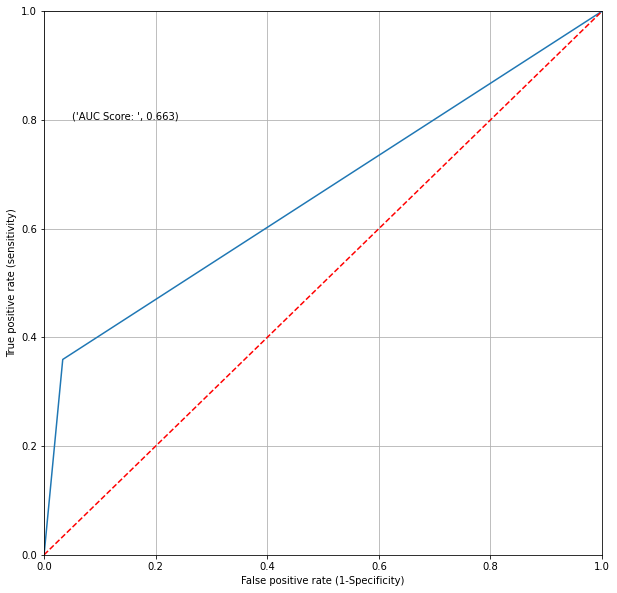

In [83]:
plt.rcParams ["figure.figsize"] = (10,10)

fpr, tpr, thersholds = roc_curve(y_test, y_pred_AB)

plt.plot(fpr, tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1], "r--")

plt.text(x = 0.05, y = 0.8, s = ("AUC Score: ", round (roc_auc_score(y_test, y_pred_AB), 4)))

plt.xlabel("False positive rate (1-Specificity)")
plt.ylabel("True positive rate (sensitivity)")

plt.grid(True)

In [84]:


AB_metrics = pd.Series({"Model" : "Adaboost",
                                "AUC Score" : metrics.roc_auc_score(y_test, y_pred_AB),
                               "Precision Score" : metrics.precision_score(y_test, y_pred_AB),
                               "Recall Score" : metrics.accuracy_score(y_test, y_pred_AB),
                               "f1-Score" : metrics.f1_score(y_test, y_pred_AB)})

result_tabulation = result_tabulation.append(AB_metrics, ignore_index = True)
result_tabulation

C:\Users\Ram\AppData\Local\Temp\ipykernel_22556\2885712868.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(AB_metrics, ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-Score
0,logistic_regression,0.638017,0.624266,0.896495,NaN,0.405337
1,Adaboost,0.662951,0.588598,0.895168,NaN,0.446262


In [85]:
# NAIVE BAYES

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

In [87]:
GNB = GaussianNB()

gnb = OneVsRestClassifier(GNB)

gnb.fit(x_train, y_train)

y_pred_gnb = gnb.predict(x_test)



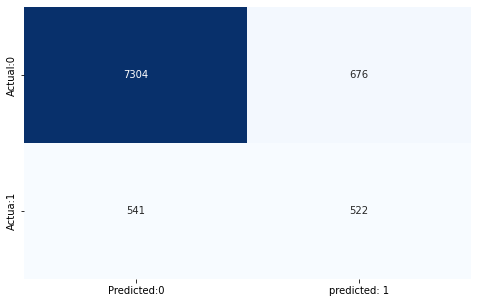

In [88]:
cm = confusion_matrix(y_test, y_pred_gnb)

conf_matrix = pd.DataFrame(data=cm, columns = ["Predicted:0", "predicted: 1"], index = ["Actual:0", "Actua:1"])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", cbar = False)

result = classification_report(y_test, y_pred_gnb)

plt.show()

In [89]:
result = classification_report(y_test, y_pred_gnb)

print(result)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7980
           1       0.44      0.49      0.46      1063

    accuracy                           0.87      9043
   macro avg       0.68      0.70      0.69      9043
weighted avg       0.87      0.87      0.87      9043



In [90]:
Naive_bayes = pd.Series({"Model" : "Naive_bayes",
                                "AUC Score" : metrics.roc_auc_score(y_test, y_pred_gnb, average="macro"),
                               "Precision Score" : metrics.precision_score(y_test, y_pred_gnb, average="macro"),
                               "Recall Score" : metrics.accuracy_score(y_test, y_pred_gnb),
                               "f1-Score" : metrics.f1_score(y_test, y_pred_gnb, average="macro")})

result_tabulation = result_tabulation.append(Naive_bayes, ignore_index = True)
result_tabulation

C:\Users\Ram\AppData\Local\Temp\ipykernel_22556\1199007167.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(Naive_bayes, ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-Score
0,logistic_regression,0.638017,0.624266,0.896495,NaN,0.405337
1,Adaboost,0.662951,0.588598,0.895168,NaN,0.446262
2,Naive_bayes,0.703176,0.683383,0.865421,NaN,0.692419


In [91]:
# KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")
knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)

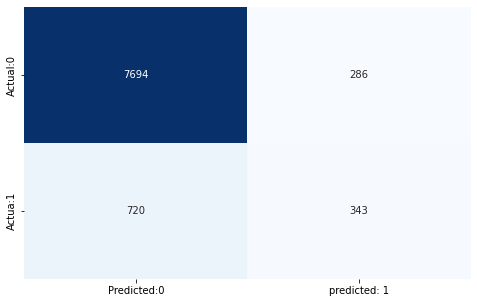

In [94]:
cm = confusion_matrix(y_test, y_pred_knn)

conf_matrix = pd.DataFrame(data=cm, columns = ["Predicted:0", "predicted: 1"], index = ["Actual:0", "Actua:1"])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", cbar = False)

result = classification_report(y_test, y_pred_knn)

plt.show()

In [95]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7980
           1       0.55      0.32      0.41      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.64      0.67      9043
weighted avg       0.87      0.89      0.88      9043



In [96]:
KNN = pd.Series({"Model" : "KNN",
                                "AUC Score" : metrics.roc_auc_score(y_test, y_pred_knn, average="macro"),
                               "Precision Score" : metrics.precision_score(y_test, y_pred_knn, average="macro"),
                               "Recall Score" : metrics.accuracy_score(y_test, y_pred_knn),
                               "f1-Score" : metrics.f1_score(y_test, y_pred_knn, average="macro")})

result_tabulation = result_tabulation.append(KNN, ignore_index = True)
result_tabulation

C:\Users\Ram\AppData\Local\Temp\ipykernel_22556\1978535214.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(KNN, ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-Score
0,logistic_regression,0.638017,0.624266,0.896495,NaN,0.405337
1,Adaboost,0.662951,0.588598,0.895168,NaN,0.446262
2,Naive_bayes,0.703176,0.683383,0.865421,NaN,0.692419
3,KNN,0.643416,0.729869,0.888754,NaN,0.672037


In [97]:
# SVM

In [98]:
from sklearn.svm import SVC

In [99]:
classifier = SVC(kernel = "rbf", random_state=1)
classifier.fit(x_train, y_train)

y_pred_svm = classifier.predict(x_test)

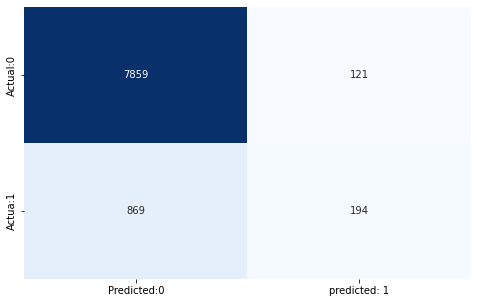

In [100]:
cm = confusion_matrix(y_test, y_pred_svm)

conf_matrix = pd.DataFrame(data=cm, columns = ["Predicted:0", "predicted: 1"], index = ["Actual:0", "Actua:1"])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", cbar = False)

result = classification_report(y_test, y_pred_svm)

plt.show()

In [101]:
SVM = pd.Series({"Model":"SVM",
                        'Precision Score': metrics.precision_score(y_test,y_pred_svm,average="macro"),
                        'Recall Score': metrics.recall_score(y_test,y_pred_svm,average="macro"),
                        'Accuracy Score': metrics.accuracy_score(y_test,y_pred_svm),
                        'f1-score': metrics.f1_score(y_test,y_pred_svm,average="macro")})

result_tabulation = result_tabulation.append(SVM, ignore_index=True)

result_tabulation

C:\Users\Ram\AppData\Local\Temp\ipykernel_22556\947857894.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVM, ignore_index=True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-Score,f1-score
0,logistic_regression,0.638017,0.624266,0.896495,NaN,0.405337,NaN
1,Adaboost,0.662951,0.588598,0.895168,NaN,0.446262,NaN
2,Naive_bayes,0.703176,0.683383,0.865421,NaN,0.692419,NaN
3,KNN,0.643416,0.729869,0.888754,NaN,0.672037,NaN
4,SVM,NaN,0.758154,0.583670,0.890523,NaN,0.611157


In [102]:
from sklearn.tree import export_graphviz
from sklearn import tree
%matplotlib inline

In [103]:
DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_score_train = DT.score(x_train, y_train)
print("Traning score :", DT_score_train)
DT_score_test = DT.score(x_train, y_train)
print("Test score", DT_score_train)

Traning score : 1.0
Test score 1.0


In [104]:
features = Bank_dup.columns.tolist()
features

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'previous',
 'recent_padys',
 'job_blue-collar',
 'job_entrepreneur',
 'job_others',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [105]:
DT = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

DT.fit(x_train, y_train)

DT_score_train = DT.score(x_train, y_train)
print("Traning score :", DT_score_train)
DT_score_test = DT.score(x_train, y_train)
print("Test score", DT_score_train)
fi = DT.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print("{:.<20} {:3}".format(features[i], fi[i]))

Traning score : 0.8970637027206371
Test score 0.8970637027206371
age................. 0.0
default............. 0.0
balance............. 0.0
housing............. 0.0
loan................ 0.0
duration............ 0.6210925483397076
campaign............ 0.0
previous............ 0.0
recent_padys........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_others.......... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_other...... 0.0
poutcome_success.... 0.3789074516602924
poutcome_unknown.... 0.0


In [106]:
print("Mean duration : ", Bank_with_dummies.duration.mean())

print("Max duration : ", Bank_with_dummies.duration.max())

print("Min duration : ", Bank_with_dummies.duration.min())

Mean duration :  258.1630797814691
Max duration :  4918
Min duration :  0


In [107]:
print(DT.predict_proba(np.array([0,0,311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]).reshape(1,-1)))
print(DT.predict(np.array([0,0,311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]).reshape(1,-1)))

[[0.94126892 0.05873108]]
[0]


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [108]:
print(DT.predict_proba(np.array([0,0,1033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1]).reshape(1,-1)))
print(DT.predict(np.array([0,0,1033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1]).reshape(1,-1)))

[[0.94126892 0.05873108]]
[0]


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
